# Training Draft

#### Xiao Xin

## Runtime Analysis

In [1]:
import numpy as np

from time import time
from math import sqrt
import matplotlib.pyplot as plt

from process.c_process import parse_input as c_parse
from process.py_process import parse_input as py_parse

%matplotlib inline

In [2]:
SOURCE = './data/strokes.txt'
ACCESS = 'r'
GRAPH_TITLE = 'Comparison of Elapsed Runtime of C and Python Parser'
X_LABEL = 'Input Size (records)'
Y_LABEL = 'Time (ms)'

In [3]:
def collect_runtime_data():
    c, py = [0], [0]
    with open(SOURCE, ACCESS) as doc:
        for line in doc:
            line = line.strip()
            
            start_time = time()
            c_parse(line, normalize=True, RDP=True)
            end_time = time()
            c.append(c[-1] + 1000 * (end_time - start_time))
            
            start_time = time()
            py_parse(line, normalize=True, RDP=True)
            end_time = time()
            py.append(py[-1] + 1000 * (end_time - start_time))
    return [c, py]

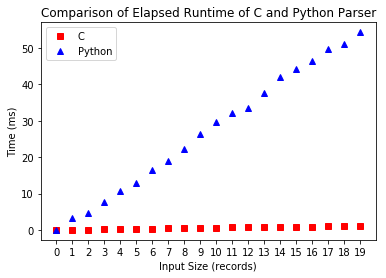

In [4]:
c, py = collect_runtime_data()
t = range(len(c))
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.xticks(t)
c_trend, = plt.plot(t, c, 'rs', label='C')
py_trend, = plt.plot(t, py, 'b^', label='Python')
plt.legend(handles=[c_trend, py_trend])
plt.title(GRAPH_TITLE)
plt.show()